## Play linear model by using tensorflow

Author: hdup  
My contact info:  
hdup [huangdan@youhujia.com](mailto:huangdan@youhujia.com)  
evitself [evitself@gmail.com](mailto:evitself@gmail.com)

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import utils
import tensorflow as tf

%matplotlib inline

### Build a model by compiling a computation graph with tensorflow

**Note:**  
*Saying in a simple way, tensorflow is a distributed computation graph framework developed by google.*   
*Keep in mind, in this computation graph, nodes are operations while edges are tensors* 


### Let's begin with some simple operations

#### 1), define some constants

In [2]:
a = tf.constant(5.)
b = tf.constant(1.2345)

#### 2), basic ops within a tf session

In [3]:
with tf.Session() as sess:
    print('a={0}, b={1}'.format(sess.run(a), sess.run(b)))
    print('a+b={0}'.format(sess.run(a+b)))
    print('a-b={0}'.format(sess.run(a-b)))
    print('a*b={0}'.format(sess.run(a*b)))
    print('a/b={0}'.format(sess.run(a/b)))

a=5.0, b=1.2345000505447388
a+b=6.234499931335449
a-b=3.765500068664551
a*b=6.172500133514404
a/b=4.050222396850586


#### 3), define some placeholder which is actually a tensor container

In [4]:
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)

#### 4), then we define some tensor operations

In [5]:
op_add = tf.add(a, b)
op_sub = tf.subtract(a, b)
op_mul = tf.multiply(a, b)
op_div = tf.divide(a, b)

#### 5), launch these operations

In [6]:
with tf.Session() as sess:
    print('a+b={0}'.format(sess.run(op_add, feed_dict={a: 1.0, b:0.5})))
    print('a-b={0}'.format(sess.run(op_sub, feed_dict={a: 1.0, b:0.5})))
    print('a*b={0}'.format(sess.run(op_mul, feed_dict={a: 1.0, b:0.5})))
    print('a/b={0}'.format(sess.run(op_div, feed_dict={a: 1.0, b:0.5})))

a+b=1.5
a-b=0.5
a*b=0.5
a/b=2.0


#### 6), let's see how to do matrix operations

In [7]:
a = np.array([[1.0, 0.5]], dtype=np.float32)
b = np.array([[0.2, 0.3]], dtype=np.float32)

In [8]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [9]:
mat_mul1 = tf.matmul(mat1, mat2, transpose_b=True)
mat_mul2 = tf.matmul(mat1, mat2, transpose_a=True)
mat_add  = tf.add(mat1, mat2)
mat_sub  = tf.subtract(mat1, mat2)
mat_elemmul = tf.multiply(mat1, mat2)

In [10]:
with tf.Session() as sess:
    dot_product1 = sess.run(mat_mul1)
    dot_product2 = sess.run(mat_mul2)
    add_ret = sess.run(mat_add)
    sub_ret = sess.run(mat_sub)
    elm_ret = sess.run(mat_elemmul)
    print('1), result is {0}, shape is {1}'.format(dot_product1, dot_product1.shape))
    print('2), result is {0}, shape is {1}'.format(dot_product2, dot_product2.shape))
    print('3), mat_a + mat_b: result is {0}, shape is {1}'.format(add_ret, add_ret.shape))
    print('4), mat_a - mat_b: result is {0}, shape is {1}'.format(sub_ret, sub_ret.shape))
    print('5), mat_a .* mat_b: result is {0}, shape is {1}'.format(elm_ret, elm_ret.shape))

1), result is [[ 0.35000002]], shape is (1, 1)
2), result is [[ 0.2         0.30000001]
 [ 0.1         0.15000001]], shape is (2, 2)
3), mat_a + mat_b: result is [[ 1.20000005  0.80000001]], shape is (1, 2)
4), mat_a - mat_b: result is [[ 0.80000001  0.19999999]], shape is (1, 2)
5), mat_a .* mat_b: result is [[ 0.2         0.15000001]], shape is (1, 2)


### Let's play with linear regression

#### Prepare sample data

In [11]:
sample_cnt = 100

train_X = np.linspace(-3.0, 3.0, num=sample_cnt, dtype=np.float32).reshape((sample_cnt, 1))
train_y = train_X * 0.375 + 1.1

print(train_X.shape)

(100, 1)


### Implement with tensorflow

#### 1), model inputs

In [12]:
X = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#### 2), mode parameters
`IMPORTANT NOTE: Variable is trainable by default`

In [13]:
W = tf.Variable(tf.random_normal((1,)), name='weights')
b = tf.Variable(tf.random_normal((1,)), name='bias')

#### 3), build model

In [14]:
# Linear function
h = tf.add(tf.multiply(X, W), b)

# MSE cost function
diff = h - y
cost = tf.reduce_sum(tf.multiply(diff, diff)) / (2 * sample_cnt)

# GD optimizer
lr = 0.01
gd = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

# initializer
init = tf.global_variables_initializer()

#### 4), training

epoch: 100, cost: 0.02079218626022339, W: [ 0.31518799], b: [ 0.9249711]
epoch: 200, cost: 0.002063177293166518, W: [ 0.37232813], b: [ 1.03593361]
epoch: 300, cost: 0.0002749930426944047, W: [ 0.37488058], b: [ 1.07654917]
epoch: 400, cost: 3.68417204299476e-05, W: [ 0.37499467], b: [ 1.09141612]
epoch: 500, cost: 4.936830919177737e-06, W: [ 0.37499952], b: [ 1.09685779]
epoch: 600, cost: 6.616775749535009e-07, W: [ 0.37499952], b: [ 1.09884965]
epoch: 700, cost: 8.854112820699811e-08, W: [ 0.37499952], b: [ 1.09957922]
epoch: 800, cost: 1.186109521711387e-08, W: [ 0.37499952], b: [ 1.09984601]
epoch: 900, cost: 1.5900813998825925e-09, W: [ 0.37499952], b: [ 1.09994364]
epoch: 1000, cost: 2.1797370852727482e-10, W: [ 0.37499952], b: [ 1.09997916]
training finished!
final cost: 2.1797370852727482e-10, W: [ 0.37499952], b: [ 1.09997916]


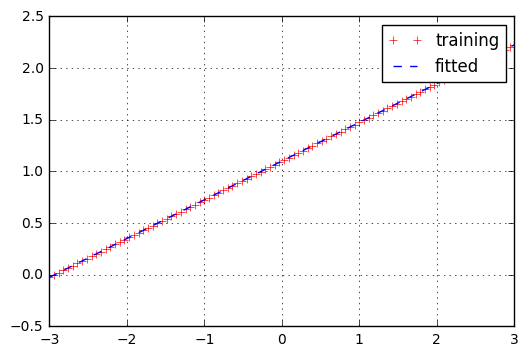

In [15]:
with tf.Session() as sess:
    # first init all variables
    sess.run(init)
    
    # batch training
    for epoch in range(0, 1000):
        sess.run(gd, feed_dict={X: train_X, y: train_y})
        if (epoch + 1) % 100 == 0:
            cur_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
            print('epoch: {0}, cost: {1}, W: {2}, b: {3}'.format(epoch + 1, cur_cost, sess.run(W), sess.run(b)))
    
    # finish
    final_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
    print('training finished!')
    print('final cost: {0}, W: {1}, b: {2}'.format(final_cost, sess.run(W), sess.run(b)))
    
    # then plot some curves
    predictions = sess.run(h, feed_dict={X: train_X})
    plt.plot(train_X, train_y, 'r+', label='training')
    plt.plot(train_X, predictions, 'b--', label='fitted')
    plt.grid(True)
    plt.legend()
    plt.show()